In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["font.family"] = 'Malgun Gothic'


In [27]:
# 다양한 형식의 연, 월, 일 표시 데이터
import pandas as pd
d_list = ["05/07/2024 11:12:13", "05-07-2024 11:22:23","2024-5-07 11:33:23", "2024/05/07"]
pd.DatetimeIndex(d_list)
pd.DatetimeIndex(d_list).year # 연도 값을 출력
pd.DatetimeIndex(d_list).month # 월 값을 출력
pd.DatetimeIndex(d_list).day #일 값을출력

Index([7, 7, 7, 7], dtype='int32')

### [실습]
* 기상 데이터 분석
* 2010년부터 10년간 울룽도 지역의 기온과 풍속을 측정한 데이터

In [28]:
# 데이터 셋 가져오기
#맥북 !wget
!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -O  weather.csv
weather = pd.read_csv("weather.csv", index_col = 0)
weather.head()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 88955  100 88955    0     0   144k      0 --:--:-- --:--:-- --:--:--  147k
curl: (6) Could not resolve host: weather.csv


,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [41]:
weather.mean()

평균 기온    12.942102
최대 풍속     7.911099
평균 풍속     3.936441
dtype: float64

In [42]:
# 1. 전체 데이터에 대하여 최대 풍속의 최대값을 출력하시오.
weather['최대 풍속'].max()

26.0

In [51]:
# 2. 데이터 정제와 결측 값 처리
# 1. 전체 테이블의 크기
print(weather.size)
# 2. 개별적인 열의 개수 확인 
print(weather.count())
# 3. 결측치 탐지 및 처리
missing_data = weather[weather['평균 풍속'].isna()]
print(missing_data )
#1)
# weather.dropna(axis=0, how='any', inplace=True)

#2) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
weather.fillna(weather['평균 풍속'].mean(), inplace=True)
weather

21918
일시       3653
평균 기온    3653
최대 풍속    3653
평균 풍속    3653
year     3653
month    3653
dtype: int64
Empty DataFrame
Columns: [일시, 평균 기온, 최대 풍속, 평균 풍속, year, month]
Index: []


,일시,평균 기온,최대 풍속,평균 풍속,year,month
0,2010-08-01,28.7,8.3,3.4,2010,8
1,2010-08-02,25.2,8.7,3.8,2010,8
2,2010-08-03,22.1,6.3,2.9,2010,8
3,2010-08-04,25.3,6.6,4.2,2010,8
4,2010-08-05,27.2,9.1,5.6,2010,8
...,...,...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7,2020,7
3649,2020-07-28,21.9,4.5,1.6,2020,7
3650,2020-07-29,21.6,3.2,1.0,2020,7
3651,2020-07-30,22.9,9.7,2.4,2020,7


In [44]:
# 3. 평균 기온 열에서 어느 연도에  평균 기온이 가장 높았는지 연도별 평균 기온을 막대그래프로 그리기
weather.head()

,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [45]:
# 3.1 
weather.reset_index(inplace=True)

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseung

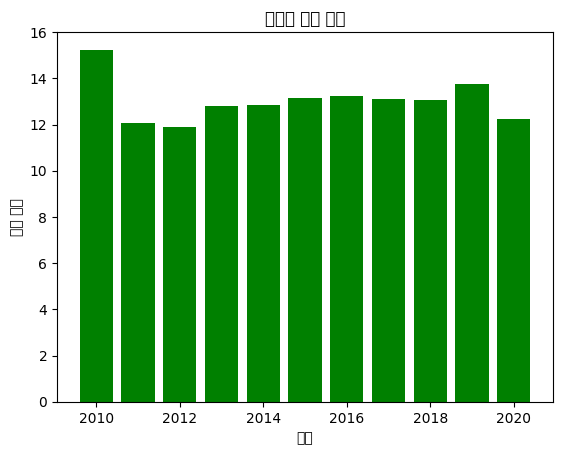

In [53]:
# 3.2 weather['일시']에서 연도 값을 추출하여 저장해서 데이터프레임에 추가하기
# year 속성을 사용하여 연별로 구분하여 평균 기온 값을 담기

weather['year'] = pd.DatetimeIndex(weather['일시']).year

yearly = [None for x in range(11)] # 연별로 구분된 10개의 None 값
yearly_temp =[0 for x in range(11)] # 연별 평균 기온을 담을 리스트

for i in range(11):
  yearly[i] = weather[weather['year'] == 2010+i]
  yearly_temp[i] = yearly[i]['평균 기온'].mean()

years = np.arange(2010,2021)
plt.bar(years, yearly_temp, color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing fro

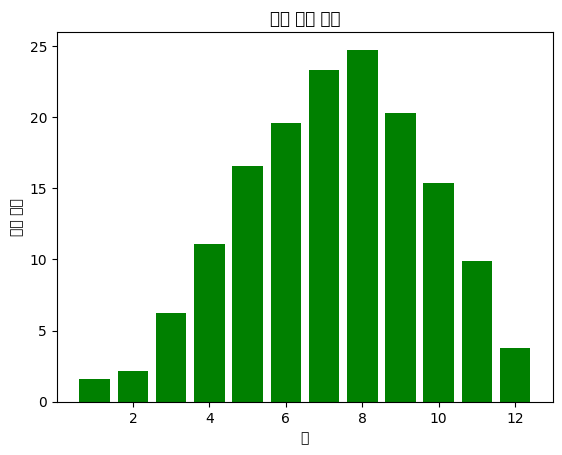

In [47]:
# 4. 어느 월에  평균 기온이 가장 높았는지 월별 평균 기온을 막대그래프로 그리기
# month 속성을 사용하여 달별로 구분하여 평균 기온 값을 담기
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly = [None for x in range(12)] # 별로 구분된 12개의 None 값
monthly_temp =[0 for x in range(12)] # 월별 평균 풍속을 담을 리스트

for i in range(12):
  monthly[i] = weather[weather['month'] == i+1]
  monthly_temp[i] = monthly[i]['평균 기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()


In [48]:
# 5. 데이터 분석을 할 때는 특정한 값에 기반하여 데이터를 그룹으로 묶는 일이 많다.
weather.head()

,일시,평균 기온,최대 풍속,평균 풍속,year,month
0,2010-08-01,28.7,8.3,3.4,2010,8
1,2010-08-02,25.2,8.7,3.8,2010,8
2,2010-08-03,22.1,6.3,2.9,2010,8
3,2010-08-04,25.3,6.6,4.2,2010,8
4,2010-08-05,27.2,9.1,5.6,2010,8


In [33]:
# 기상 정보를 월별로 분석하기
## 데이터가 속한 달을 판단해 새로운 열로 만들고, 이 열을 기준으로 데이터를 묶어 평균값 구하기
# weather['month'] = pd.DatetimeIndex(weather['일시']).month
print(weather)

monthly_means = weather.groupby('month')[['평균 기온','최대 풍속', '평균 풍속']].mean()
monthly_means

            평균 기온  최대 풍속  평균 풍속
일시                             
2010-08-01   28.7    8.3    3.4
2010-08-02   25.2    8.7    3.8
2010-08-03   22.1    6.3    2.9
2010-08-04   25.3    6.6    4.2
2010-08-05   27.2    9.1    5.6
...           ...    ...    ...
2020-07-27   22.1    4.2    1.7
2020-07-28   21.9    4.5    1.6
2020-07-29   21.6    3.2    1.0
2020-07-30   22.9    9.7    2.4
2020-07-31   25.7    4.8    2.5

[3653 rows x 3 columns]


KeyError: '일시'

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing fro

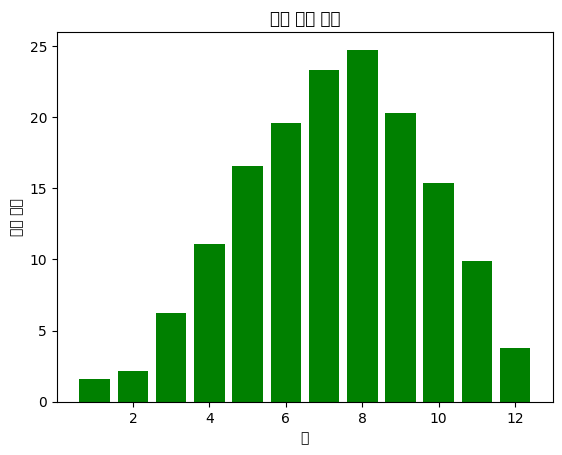

In [27]:
plt.bar(np.arange(1,13), monthly_means['평균 기온'], color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()

In [ ]:
# 6. 기상 정보를 연도별로 분석하기
# weather['year'] = pd.DatetimeIndex(weather['일시']).year
yearly_means = weather.groupby('year')[['평균 기온','최대 풍속', '평균 풍속']].mean()
yearly_means

In [ ]:
plt.bar(np.arange(2010,2021), yearly_means['평균 기온'], color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()

In [ ]:
# 필터링 : 특정한 조건 값을 주어서 데이터프레임의 값을 필터링하기
# 7. 평균 풍속이 4.0이 넘는 달만 추출하기
weather.head()

In [ ]:
# weather[weather['평균 풍속'] >= 4.0]
monthly_means.head()
monthly_means[monthly_means['평균 풍속'] >= 4.0]

NameError: name 'yearly_means' is not defined

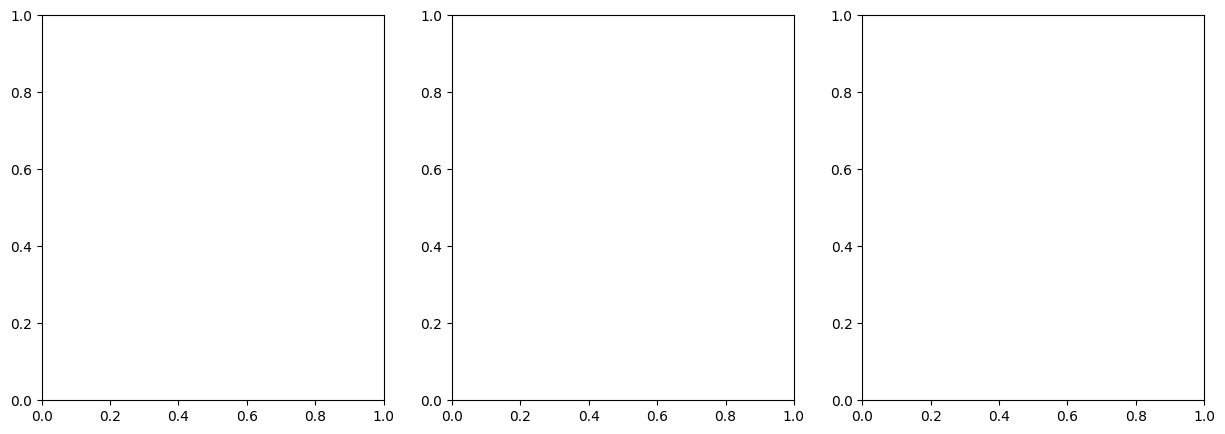

In [58]:
# 8. '평균 기온', '최대 풍속', '평균 풍속'을 하나의 히스트그램으로 출력하시오.
# groupby()와 DatetimeIndex().year을 사용

# Calculate the yearly means
#yearly_means = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].mean()

# 히스토그램 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for average temperature
axs[0].hist(yearly_means['평균 기온'], bins=10, color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("평균 기온")
axs[0].set_ylabel("빈도수")


# Plot the histogram for maximum wind speed
axs[1].hist(yearly_means['최대 풍속'], bins=10, color="green")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("최대 풍속")
axs[1].set_ylabel("빈도수")

# Plot the histogram for average wind speed
axs[2].hist(yearly_means['평균 풍속'], bins=10, color="blue")
axs[2].set_title("연도별 평균 풍속")
axs[2].set_xlabel("평균 풍속")
axs[2].set_ylabel("빈도수")


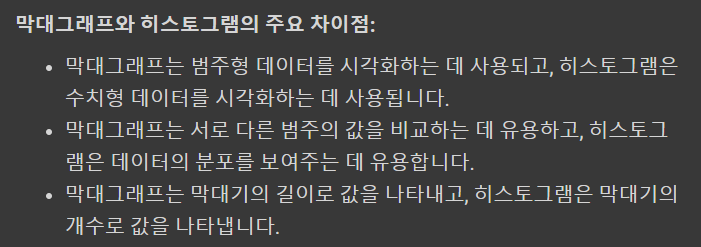

/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph

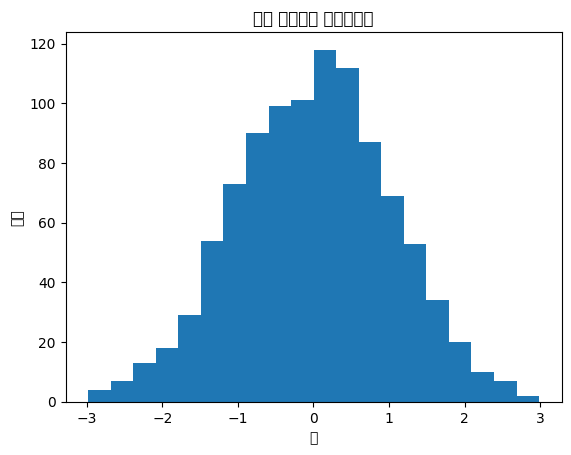

In [59]:
# 히스토그램 사용 예
import matplotlib.pyplot as plt

# 임의의 데이터 생성
data = np.random.randn(1000)

# 히스토그램 그리기
# plt.hist(data)
plt.hist(data, bins=20) #기본 구간 10개 대신 구간 20개로 히스토그램

# 레이블과 제목 추가
plt.xlabel("값")
plt.ylabel("빈도")
plt.title("임의 데이터의 히스토그램")

# 그래프 표시
plt.show()

In [ ]:
# 한 그림에 여러 개의 히스토그램 그리기:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

data1 = np.random.randn(1000)
data2 = np.random.randn(1000) + 2

axs[0].hist(data1, bins=10, color = "red", label="data2")
axs[0].set_title("data1")
axs[0].set_xlabel("bins")
axs[0].set_ylabel("freq")

axs[1].hist(data2, bins=10, alpha=0.5, label="data 1")
axs[1].set_title("data2")
axs[1].set_xlabel("bins")
axs[1].set_ylabel("freq")

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-14까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [4]:
print(weather.head(3))
print(weather.tail(3))

            평균 기온  최대 풍속  평균 풍속
일시                             
2010-08-01   28.7    8.3    3.4
2010-08-02   25.2    8.7    3.8
2010-08-03   22.1    6.3    2.9
            평균 기온  최대 풍속  평균 풍속
일시                             
2020-07-29   21.6    3.2    1.0
2020-07-30   22.9    9.7    2.4
2020-07-31   25.7    4.8    2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


In [6]:
print(weather.loc['2015-06-06', ['평균 기온', '평균 풍속']])

평균 기온    16.6
평균 풍속     1.9
Name: 2015-06-06, dtype: float64


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [31]:
max_temp = weather['평균 기온'].max()
print(weather[weather['평균 기온'] == max_temp])
print(weather['일시'])

            평균 기온  최대 풍속  평균 풍속
일시                             
2013-08-08   31.3    7.8    4.6


KeyError: '일시'

## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [8]:
print(weather[weather['평균 기온'] > 30])

            평균 기온  최대 풍속  평균 풍속
일시                             
2013-08-08   31.3    7.8    4.6
2013-08-09   30.6    9.9    6.4
2013-08-10   30.6    7.4    3.8
2018-07-23   30.5    6.5    1.6
2018-08-04   30.3    5.8    3.0


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: 

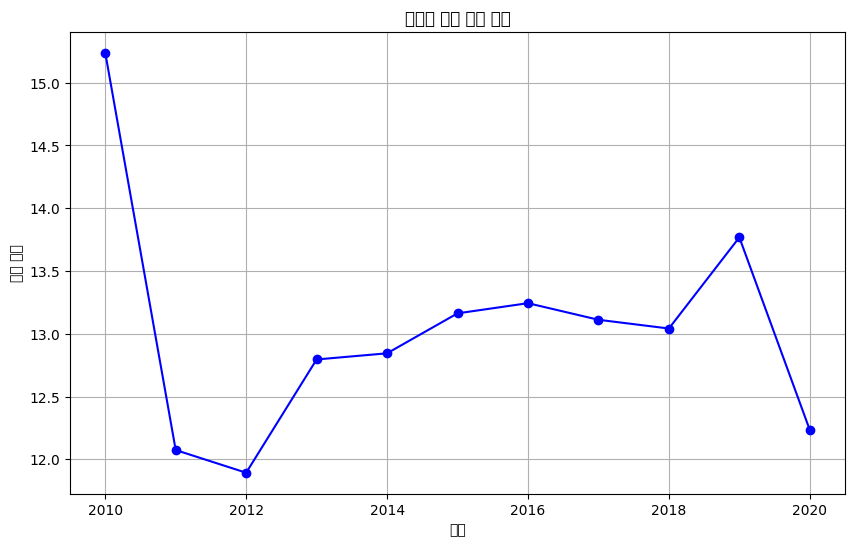

In [52]:
import matplotlib.pyplot as plt


weather['일시'] = pd.to_datetime(weather.index)
weather['연도'] = weather['일시'].dt.year

average_temp_by_year = weather.groupby('연도')['평균 기온'].mean()


plt.figure(figsize=(10, 6))
plt.plot(average_temp_by_year.index, average_temp_by_year, marker='o', color='b', linestyle='-')
plt.title('연도별 평균 기온 추이')
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.grid(True)
plt.show()


## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning

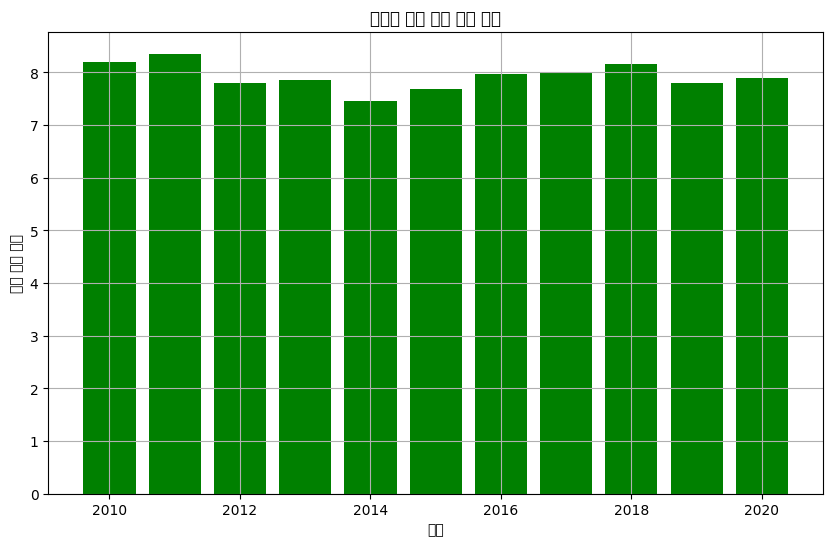

In [62]:
import matplotlib.pyplot as plt


weather['일시'] = pd.to_datetime(weather.index)
weather['연도'] = weather['일시'].dt.year

average_wind_by_year = weather.groupby('연도')['최대 풍속'].mean()


plt.figure(figsize=(10, 6))
plt.bar(average_wind_by_year.index, average_wind_by_year, color="green")
plt.title('연도별 최대 풍속 평균 추이')
plt.xlabel('연도')
plt.ylabel('평균 최대 풍속')
plt.grid(True)
plt.show()

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


연도
2010     622.6
2011    1551.7
2012    1402.6
2013    1414.3
2014    1393.0
2015    1379.2
2016    1455.9
2017    1436.2
2018    1491.2
2019    1403.0
2020     806.5
Name: 평균 풍속, dtype: float64


/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leeseungryeol/PandasProject/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: 

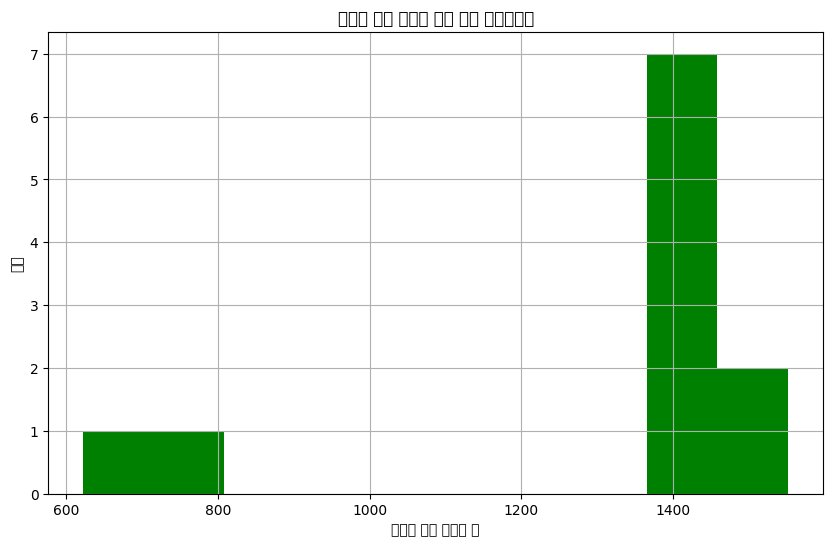

In [61]:
import matplotlib.pyplot as plt


weather['일시'] = pd.to_datetime(weather.index)
weather['연도'] = weather['일시'].dt.year

sum_wind_speed_by_year = weather.groupby('연도')['평균 풍속'].sum()

plt.figure(figsize=(10, 6))
plt.hist(sum_wind_speed_by_year, color="green", bins=10)
plt.title('연도별 평균 풍속의 합에 대한 히스토그램')
plt.xlabel('연도별 평균 풍속의 합')
plt.ylabel('빈도')
plt.grid(True)
plt.show()

## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [63]:
import matplotlib.pyplot as plt


weather['일시'] = pd.to_datetime(weather.index)
weather['연도'] = weather['일시'].dt.year

average_temp_by_year = weather.groupby('연도')['평균 기온'].mean()


mean_temp_2015 = average_temp_by_year.loc[2015]
mean_temp_2016 = average_temp_by_year.loc[2016]

if mean_temp_2015 < mean_temp_2016:
    print("2016년도가 더웠습니다.")
elif mean_temp_2015 > mean_temp_2016:
    print("2015년도가 더웠습니다.")
else:
    print("기온이 같습니다.")

2016년도가 더웠습니다.


## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [73]:
import matplotlib.pyplot as plt


weather['일시'] = pd.to_datetime(weather.index)
weather['월'] = weather['일시'].dt.month

average_temp_by_month = weather.groupby('월')['평균 기온'].sum()

min_temp_month = average_temp_by_month.idxmin()
max_temp_month = average_temp_by_month.idxmax()

print("합이 가장 적은 달 : ", min_temp_month, "월")
print("합이 가장 많은 달 : ", max_temp_month, "월")


월
1      495.5
2      604.6
3     1937.6
4     3319.4
5     5134.9
6     5885.0
7     7231.8
8     7672.1
9     6097.1
10    4769.0
11    2966.9
12    1163.6
Name: 평균 기온, dtype: float64
합이 가장 적은 달 :  1 월
합이 가장 많은 달 :  8 월


## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [74]:
weather['일시'] = pd.to_datetime(weather.index)
weather['연도'] = weather['일시'].dt.year

average_wing_by_year = weather.groupby('연도')['최대 풍속'].mean()
max_wind_year = average_wing_by_year.idxmax()

print("최대 풍속의 평균이 가장 큰 연도 : ", max_wind_year, "년")

연도
2010    8.205229
2011    8.355616
2012    7.794490
2013    7.859726
2014    7.458904
2015    7.694247
2016    7.963934
2017    8.001370
2018    8.158630
2019    7.796703
2020    7.897183
Name: 최대 풍속, dtype: float64
최대 풍속의 평균이 가장 큰 연도 :  2011 년
